In [17]:
import networkx as nx
import numpy as np


def calculate_node_execution_time(task_graph, net_graph, task_difficulties, transfer_cost):
    """
    Вычисляет время работы каждого узла сети на основе графа задач и их связи.

    :param task_graph: Граф задач (NetworkX DiGraph), где узлы — задачи, а ребра — связи между задачами.
    :param net_graph: Граф сети (NetworkX Graph), где узлы — сетевые узлы.
    :param task_difficulties: Словарь, отражающий трудоемкость каждой задачи {task: трудоемкость}.
    :param transfer_cost: Стоимость пересылки данных между связанными задачами.
    :return: Словарь со временем выполнения для каждого сетевого узла {node: время выполнения}.
    """
    # Временное накопление работы для каждого сетевого узла
    node_execution_time = {node: 0 for node in net_graph.nodes}

    # Перебор всех задач для вычисления времени
    for task in task_graph.nodes:
        # Предполагаем, что выполнение задачи происходит на одном узле,
        # и получаем узел, на котором задача выполняется
        network_node = task % len(net_graph.nodes)  # Пример распределения задач

        # Добавляем трудоемкость задачи ко времени работы узла
        node_execution_time[network_node] += task_difficulties[task]

    # Перебор всех связей для вычисления времени пересылки
    for u, v in task_graph.edges:
        # Узлы в сети, на которых расположены задачи u и v соответственно
        network_node_u = u % len(net_graph.nodes)
        network_node_v = v % len(net_graph.nodes)

        if network_node_u != network_node_v:
            # Если задачи находятся на разных узлах, учитываем время пересылки
            node_execution_time[network_node_u] += transfer_cost
            node_execution_time[network_node_v] += transfer_cost
    
    return node_execution_time


# Пример использования
# Создаем граф задач
task_graph = nx.DiGraph()
task_graph.add_edges_from([(0, 1), (1, 2), (2, 3)])

# Создаем граф сети
net_graph = nx.Graph()
net_graph.add_edges_from([(0, 1), (1, 2), (0, 2)])

# Трудоемкость каждой задачи
task_difficulties = {0: 100, 1: 200, 2: 150, 3: 100}

# Стоимость пересылки
transfer_cost = 50

node_execution_times = calculate_node_execution_time(task_graph, net_graph, task_difficulties, transfer_cost)

print("Время выполнения для каждого сетевого узла:", node_execution_times)


Время выполнения для каждого сетевого узла: {0: 300, 1: 300, 2: 250}


In [18]:
import networkx as nx

def compute_node_times(task_graph, network_graph, task_weights, transfer_weights, task_assignment):
    """
    Вычисление времени выполнения задач на каждом узле сети.
    
    :param task_graph: Граф задач (nx.DiGraph), описывающий зависимости между задачами.
    :param network_graph: Граф сети (nx.Graph), описывающий расположение узлов.
    :param task_weights: Список трудоемкостей задач.
    :param transfer_weights: Матрица трудоемкостей передачи (времени).
    :param task_assignment: Список распределения задач по узлам сети.
    :return: Вектор времени выполнения на каждом узле сети.
    """
    
    num_tasks = task_graph.number_of_nodes()
    num_nodes = network_graph.number_of_nodes()
    
    # Время инициализации для каждого узла сети
    node_times = [0] * num_nodes
    
    # Найдем критический путь в графе задач
    for task in nx.topological_sort(task_graph):
        # Узел сети, на который назначена текущая задача
        assigned_node = task_assignment[task]
        
        # Время завершения текущей задачи
        task_completion_time = node_times[assigned_node] + task_weights[task]
        
        # Обновляем время узла в сети
        node_times[assigned_node] = task_completion_time
        
        # Обрабатываем все задачи, зависящие от текущей
        for successor in task_graph.successors(task):
            # Узел сети, на который назначена следующая задача
            successor_node = task_assignment[successor]
            
            # Если задачa передается на другой узел сети, добавляем время передачи
            if assigned_node != successor_node:
                transfer_time = transfer_weights[task][successor]
            else:
                transfer_time = 0
            
            # Обновляем время узла в сети с учетом передачи
            node_times[successor_node] = max(node_times[successor_node],
                                             task_completion_time + transfer_time)
    
    return node_times

# Пример использования
task_graph = nx.DiGraph([
    (0, 1), (0, 2), (1, 3), (2, 3)
])
network_graph = nx.Graph([
    (0, 1), (1, 2)
])
task_weights = [3, 2, 2, 4]
transfer_weights = [
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0,0, 1],
    [0, 0, 0, 0]
]
task_assignment = [0, 1, 0, 1]

node_times = compute_node_times(task_graph, network_graph, task_weights, transfer_weights, task_assignment)
print("Время работы узлов сети:", node_times)


Время работы узлов сети: [5, 10, 0]


In [15]:
import networkx as nx

# Создание графа
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])

# Нахождение количества узлов в графе
num_nodes = G.number_of_nodes()

print("Количество узлов в графе: ", num_nodes)

Количество узлов в графе:  5


c:\Users\user\Documents\MATH\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:312: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


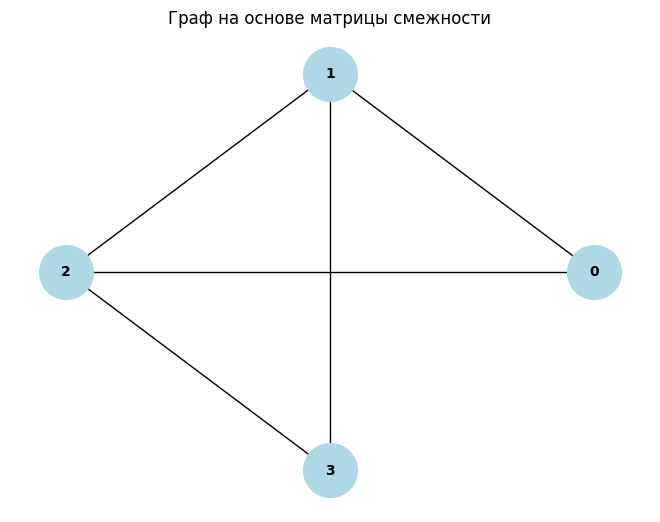

Кратчайшие пути для каждого узла к другим:
От узла 0 до остальных узлов: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3]}
От узла 1 до остальных узлов: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3]}
От узла 2 до остальных узлов: {2: [2], 0: [2, 0], 1: [2, 1], 3: [2, 3]}
От узла 3 до остальных узлов: {3: [3], 1: [3, 1], 2: [3, 2], 0: [3, 1, 0]}


In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Создание матрицы смежности
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

# Создание графа на основе матрицы смежности
G = nx.from_numpy_array(adjacency_matrix)

# Рисование графа
pos = nx.circular_layout(G)  # Определяем позиции узлов для рисования
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold', font_size=10, arrowsize=20)
plt.title('Граф на основе матрицы смежности')
plt.show()

# Нахождение кратчайших путей для каждого узла к другим
shortest_paths = dict(nx.all_pairs_shortest_path(G))

print("Кратчайшие пути для каждого узла к другим:")
for node in shortest_paths:
    print("От узла", node, "до остальных узлов:", shortest_paths[node])


In [1]:
from main import Vector, OptimizationProblem
import copy

In [2]:
problem = OptimizationProblem(v_constraints={
    'len':3,
    'constraints': [(0, 2), (1, 3), (2, 4)],
    'dtype': int
})

In [3]:
# Создание вектора с ограничением длины 3 и ограничением диапазона значений элементов
v = Vector([1, 2, 3])
print("Исходный вектор:", v)

2024-08-17 19:43:36,746 - INFO - Вектор успешно инициализирован: [1 2 3]


Исходный вектор: Вектор [1 2 3]


In [4]:
# Попытка изменить элемент на значение вне допустимого диапазона
v[1] = 5

2024-08-17 19:43:36,753 - ERROR - Элемент [1 5 3] меньше или больше ограничений [[0 2]
 [1 3]
 [2 4]]


In [5]:
# Изменение элемента в допустимом диапазоне
print("Вектор до изменения:", v)
v[1] = 2.5
print("Вектор после изменения:", v)

Вектор до изменения: Вектор [1 3 3]
Вектор после изменения: Вектор [1 2 3]


In [6]:
# Создание нового вектора
v2 = Vector([0.5, 1.5, 2.5])

2024-08-17 19:43:36,766 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:43:36,767 - INFO - Вектор успешно инициализирован: [0 1 2]


In [7]:
# Выполнение операций с векторами
v_sum = v + v2
v_diff = v - v2
v_prod = v * 2
v_div = v / 2

2024-08-17 19:43:36,772 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:43:36,773 - ERROR - Элемент [1 3 5] меньше или больше ограничений [[0 2]
 [1 3]
 [2 4]]
2024-08-17 19:43:36,773 - INFO - Вектор успешно инициализирован: [1 3 4]
2024-08-17 19:43:36,774 - INFO - Выполнено сложение двух векторов.
2024-08-17 19:43:36,775 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:43:36,776 - ERROR - Элемент [1 1 1] меньше или больше ограничений [[0 2]
 [1 3]
 [2 4]]
2024-08-17 19:43:36,776 - INFO - Вектор успешно инициализирован: [1 1 2]
2024-08-17 19:43:36,777 - INFO - Выполнено вычитание двух векторов.
2024-08-17 19:43:36,777 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:43:36,778 - ERROR - Элемент [2 4 6] меньше или больше ограничений [[0 2]
 [1 3]
 [2 4]]
2024-08-17 19:43:36,778 - INFO - Вектор успешно инициализирован: [2 3 4]
2024-08-17 19

In [8]:

print("Сумма векторов:", v_sum)
print("Разность векторов:", v_diff)
print("Произведение вектора на 2:", v_prod)
print("Деление вектора на 2:", v_div)

Сумма векторов: Вектор [1 3 4]
Разность векторов: Вектор [1 1 2]
Произведение вектора на 2: Вектор [2 3 4]
Деление вектора на 2: Вектор [0 1 2]


In [9]:
v3 = copy.copy(v)

In [10]:
print(id(v3))
print(id(v))

2821658352512
2821657848688


In [11]:
print(v3)
print(v)

Вектор [1 2 3]
Вектор [1 2 3]


In [14]:
print([Vector() for _ in range(10)])

2024-08-17 19:44:06,740 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:44:06,741 - INFO - Вектор успешно инициализирован: [0 2 2]
2024-08-17 19:44:06,742 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:44:06,742 - INFO - Вектор успешно инициализирован: [1 2 2]
2024-08-17 19:44:06,743 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:44:06,743 - INFO - Вектор успешно инициализирован: [0 1 3]
2024-08-17 19:44:06,743 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:44:06,744 - INFO - Вектор успешно инициализирован: [0 1 2]
2024-08-17 19:44:06,744 - WARNING - Преобразование типов: входные данные не соответствуют типу <class 'int'>
2024-08-17 19:44:06,744 - INFO - Вектор успешно инициализирован: [0 2 2]
2024-08-17 19:44:06,746 - WARNING - Преобразование типов: входные данные не соответствуют 

[Вектор [0 2 2], Вектор [1 2 2], Вектор [0 1 3], Вектор [0 1 2], Вектор [0 2 2], Вектор [1 1 2], Вектор [1 2 3], Вектор [1 2 2], Вектор [1 2 3], Вектор [1 2 3]]


In [12]:
from main import Vector, OptimizationProblem, SimpleOptimizer
import copy

In [13]:
def f1(x):
    return sum(x)


# Пример использования
objective_functions = [f1]
constraints = []
problem = OptimizationProblem(initial_vector=[0,0,0,0,0,0,0,0,0,0,0,0])
optimizer = SimpleOptimizer(problem)
optimizer.optimize()

TypeError: OptimizationProblem.__init__() got an unexpected keyword argument 'initial_vector'